<a href="https://colab.research.google.com/github/ssosoo/2024_DS60/blob/main/%EB%B3%B4%ED%8C%85_%EC%95%99%EC%83%81%EB%B8%94_%EC%86%90%EA%B8%80%EC%94%A8_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

**단일 모델의 정확도 측정**

변수에 모델 호출

x와 y train fit하기.

X_test를 대입한 예측값 저장

In [7]:
dtree = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 8,
                                      max_features = 32, random_state = 35)
dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors = 299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(C=0.1, gamma = 0.003, probability = True, random_state = 35).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
print("[accuracy]")
print("d-tree: " , accuracy_score(y_test, dtree_predicted))
print("knn: ", accuracy_score(y_test, knn_predicted))
print("svm: ", accuracy_score(y_test, svm_predicted))

[accuracy]
d-tree:  0.8527777777777777
knn:  0.8222222222222222
svm:  0.8416666666666667


**분류값 별 확률 확인**

사이킷런의 voting classfier를 사용해 소프트or하드 보팅을 구현한다.



하단 predict_proba 함수는 svm으로부터 나온 테스트 데이터 2개의 0부터 9까지의 확률을 볼 수 있다.

각 데이터가 n차원 배열로 나열되었을 때 하나의 배열에서 특정 원소일 확률값을 나타내는 것.

In [8]:
svm_proba = svm.predict_proba(X_test)
#모든 테스트 결과중 두개만 출력
print(svm_proba[0:2])

[[1.18158595e-02 3.26866669e-01 6.92926449e-02 2.61616536e-02
  5.04623087e-02 1.16009168e-01 2.55473693e-02 4.98003052e-02
  2.44898622e-01 7.91453998e-02]
 [6.13802590e-04 1.04055650e-03 6.48442092e-04 4.74673944e-04
  7.29572906e-04 9.03134166e-04 9.92330757e-01 7.14840053e-04
  1.49038635e-03 1.05383398e-03]]


**하드 보팅**

예측값들을 모아 가장 많은 투표를 받은 예측값으로 선정

In [10]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
    weights = [1,1,1], voting='hard').fit(X_train, y_train)

hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.8916666666666667

**소프트 보팅**

각 분류모델의 predict_proba를 활용해 모든 분류값들의 확률을 더해, 가장 높은 점수를 취득한 분류값으로 선정

In [14]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1,1,1], voting = 'soft').fit(X_train, y_train)

soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.9

**단일 모델과 앙상블 모델의 비교 시각화**

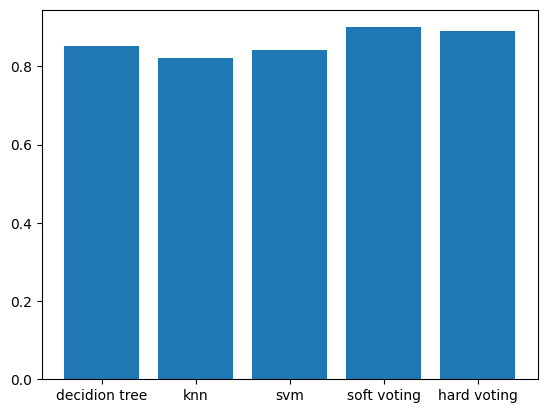

In [17]:
from ast import increment_lineno
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(5)
plt.bar(x, height = [accuracy_score(y_test, dtree_predicted),
                     accuracy_score(y_test, knn_predicted),
                     accuracy_score(y_test, svm_predicted),
                     accuracy_score(y_test, soft_voting_predicted),
                     accuracy_score(y_test, hard_voting_predicted)
                     ])

plt.xticks(x, ['decidion tree', 'knn', 'svm', 'soft voting', 'hard voting']);